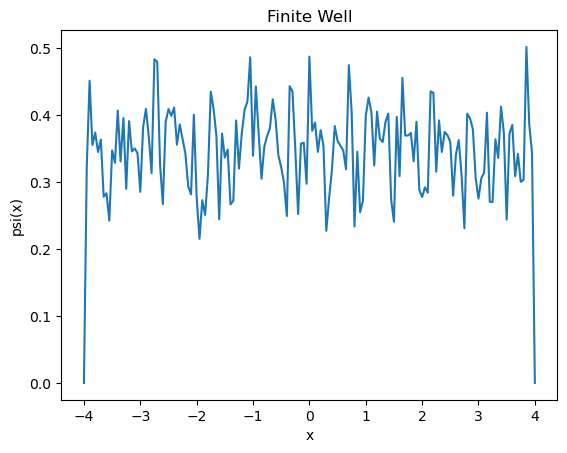

Final Energy: 9.164597799699465


In [2]:
import numpy as np
import matplotlib.pyplot as plt

dx = 0.05
N = int(1/dx)
bound = 4
x = np.arange(-bound, bound+dx, dx)
well = 1
w = np.arange(-well, well+dx, dx)
n = int(2*bound*N)
m = int(2*well*N)
E_limit = 0.00000000001
Err = 1
V = -10
psi_x = np.zeros(n+1)

def normalization(f, N):
    A = np.sqrt(N/(np.dot(f, f.T)))
    return A*f

def energy(f, bound, well, n, N, V):
    s1 = 0
    s2 = 0
    k1 = int((bound - well)*N)
    for i in range(n):
        s1 += (f[i+1]-f[i])**2
    for j in range(k1, k1+2*well*N+1):
        s2 += f[j+1]**2
    E = (N/2)*s1 + ((V*s2)/N)
    return E

def generate(n, iter):
    if iter < 100:
        r = 0.0005*np.random.rand(n-1)
    else:
        r = 0.0005*np.random.rand(n-1) - 0.00025
    return np.concatenate(([0], r, [0]))

for _ in range(10):
    Err = 1
    iter = 0
    k = 1/3

    f = generate(n, iter)
    f = normalization(f, N)
    E = energy(f, bound, well, n, N, V)
    while Err > E_limit and iter < 100:
        f_new = generate(n, iter)
        f_new = normalization(f + f_new, N)
        E_new = energy(f_new, bound, well, n, N, V)
        if E_new < E:
            f = normalization(f_new + k*f, N)
            E_new = energy(f, bound, well, n, N, V)
            Err = abs((E-E_new)/E)
            E = E_new
        iter += 1
    psi_x += f

psi_x /= 10
psi_x = normalization(psi_x, N)
plt.plot(x, psi_x)
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.title("Finite Well")
plt.show()

E = energy(psi_x, bound, well, n, N, V)
print("Final Energy:", E)

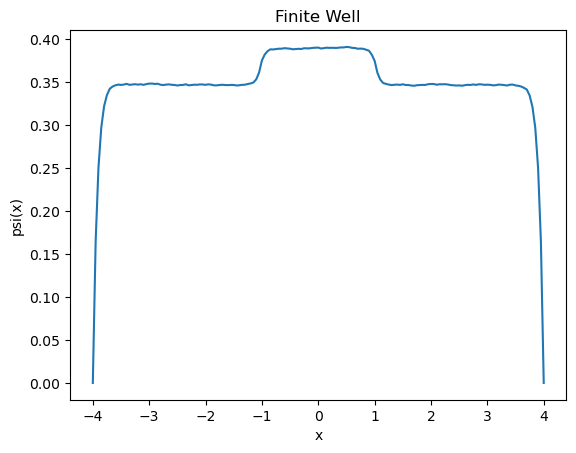

Energy: -2.3353800103374764


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def normalization(f, N):
    A = np.sqrt(N / np.dot(f, f))
    return A * f

def energy(f, bound, well, n, N, V):
    s1 = np.sum(np.diff(f) ** 2)
    k1 = int((bound - well) * N)
    s2 = np.sum(f[k1:(k1 + 2 * well * N + 1)] ** 2)
    return (N / 2) * s1 + (V * s2) / N

def generate(n, iter):
    if iter < 100000:
        r = 0.0005 * np.random.rand(n - 1)
    else:
        r = 0.0005 * np.random.rand(n - 1) - 0.00025
    return np.concatenate(([0], r, [0]))

dx = 0.05
N = int(1 / dx)
bound = 4
well = 1
x = np.arange(-bound, bound + dx, dx)
w = np.arange(-well, well + dx, dx)
n = int(2 * bound * N)
m = int(2 * well * N)
E_limit = 0.00000000001
V = -10
psi_x = np.zeros(n + 1)

for i in range(10):
    Err = 1
    iter = 0
    k = 1 / 3
    f = generate(n, iter)
    f = normalization(f, N)
    E = energy(f, bound, well, n, N, V)

    while Err > E_limit and iter < 100000:
        f_new = generate(n, iter)
        f_new = normalization(f + f_new, N)
        E_new = energy(f_new, bound, well, n, N, V)

        if E_new < E:
            f = normalization(f_new + k * f, N)
            E_new = energy(f, bound, well, n, N, V)
            Err = abs((E - E_new) / E)
            E = E_new
        iter += 1

    psi_x += f

psi_x /= 10
psi_x = normalization(psi_x, N)
plt.plot(x, psi_x)
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.title("Finite Well")
plt.show()

E = energy(psi_x, bound, well, n, N, V)
print("Energy:", E)


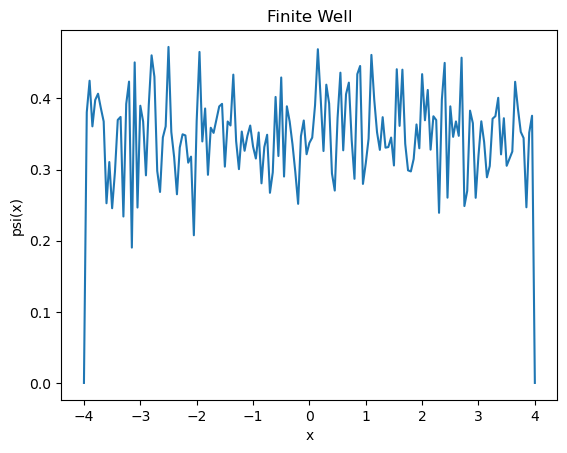

Energy: 10.575320625692203


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def normalization(f, N):
    A = np.sqrt(N / np.dot(f, f))
    return A * f

def energy(f, bound, well, n, N, V):
    s1 = np.sum(np.diff(f) ** 2)
    k1 = int((bound - well) * N)
    s2 = np.sum(f[k1:(k1 + 2 * well * N + 1)] ** 2)
    return (N / 2) * s1 + (V * s2) / N

def generate(n, iter):
    if iter < 100000:
        r = 0.0005 * np.random.rand(n - 1)
    else:
        r = 0.0005 * np.random.rand(n - 1) - 0.00025
    return np.concatenate(([0], r, [0]))

dx = 0.05
N = int(1 / dx)
bound = 4
well = 1
x = np.arange(-bound, bound + dx, dx)
w = np.arange(-well, well + dx, dx)
n = int(2 * bound * N)
m = int(2 * well * N)
E_limit = 0.00000000001
V = -10
psi_x = np.zeros(n + 1)

for i in range(10):
    Err = 1
    iter = 0
    k = 1000
    f = generate(n, iter)
    f = normalization(f, N)
    E = energy(f, bound, well, n, N, V)

    while Err > E_limit and iter < 1000000:
        f_new = generate(n, iter)
        f_new = normalization(f + f_new, N)
        E_new = energy(f_new, bound, well, n, N, V)

        if E_new < E:
            f = normalization(f_new + k * f, N)
            E_new = energy(f, bound, well, n, N, V)
            Err = abs((E - E_new) / E)
            E = E_new
        iter += 1

    psi_x += f

psi_x /= 10
psi_x = normalization(psi_x, N)
plt.plot(x, psi_x)
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.title("Finite Well")
plt.show()

E = energy(psi_x, bound, well, n, N, V)
print("Energy:", E)


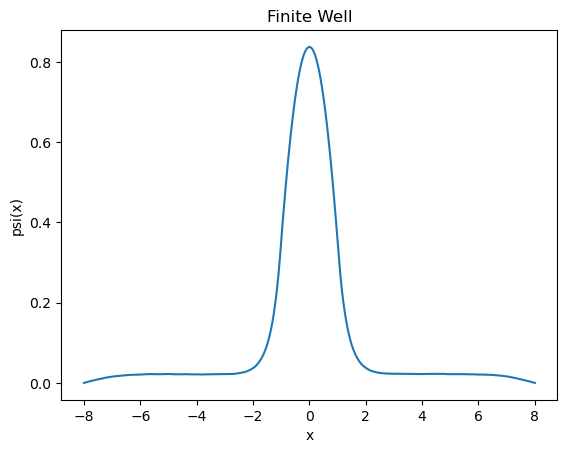

Energy: -4.299006047447508


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def normalization(f, N):
    A = np.sqrt(N / np.dot(f, f))
    return A * f

def energy(f, bound, well, n, N, V):
    s1 = np.sum(np.diff(f) ** 2)
    k1 = int((bound - well) * N)
    s2 = np.sum(f[k1:(k1 + 2 * well * N + 1)] ** 2)
    return (N / 2) * s1 + (V * s2) / N

def generate(n, iter):
    if iter < 100000:
        r = 0.0005 * np.random.rand(n - 1)
    else:
        r = 0.0005 * np.random.rand(n - 1) - 0.00025
    return np.concatenate(([0], r, [0]))

dx = 0.05
N = int(1 / dx)
bound = 8
well = 1
x = np.arange(-bound, bound + dx, dx)
w = np.arange(-well, well + dx, dx)
n = int(2 * bound * N)
m = int(2 * well * N)
E_limit = 0.00000000001
V = -5
psi_x = np.zeros(n + 1)

for i in range(10):
    Err = 1
    iter = 0
    k = 1/3 
    f = generate(n, iter)
    f = normalization(f, N)
    E = energy(f, bound, well, n, N, V)

    while Err > E_limit and iter < 1000000:
        f_new = generate(n, iter)
        f_new = normalization(f + f_new, N)
        E_new = energy(f_new, bound, well, n, N, V)

        if E_new < E:
            f = normalization(f_new + k * f, N)
            E_new = energy(f, bound, well, n, N, V)
            Err = abs((E - E_new) / E)
            E = E_new
        iter += 1

    psi_x += f

psi_x /= 10
psi_x = normalization(psi_x, N)
plt.plot(x, psi_x)
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.title("Finite Well")
plt.show()

E = energy(psi_x, bound, well, n, N, V)
print("Energy:", E)


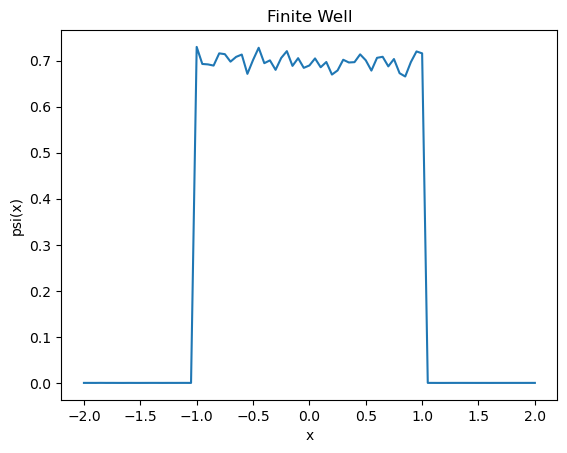

Energy: -99999999866933.58


In [21]:
 import numpy as np
import matplotlib.pyplot as plt

def normalization(f, N):
    A = np.sqrt(N / np.dot(f, f))
    return A * f

def energy(f, bound, well, n, N, V):
    s1 = np.sum(np.diff(f) ** 2)
    k1 = int((bound - well) * N)
    s2 = np.sum(f[k1:(k1 + 2 * well * N + 1)] ** 2)
    return (N / 2) * s1 + (V * s2) / N

def generate(n, iter):
    if iter < 100000:
        r = 0.0005 * np.random.rand(n - 1)
    else:
        r = 0.0005 * np.random.rand(n - 1) - 0.00025
    return np.concatenate(([0], r, [0]))

dx = 0.05
N = int(1 / dx)
bound =2
well = 1
x = np.arange(-bound, bound + dx, dx)
w = np.arange(-well, well + dx, dx)
n = int(2 * bound * N)
m = int(2 * well * N)
E_limit = 0.00000000001
V = -99999999999999
psi_x = np.zeros(n + 1)

for i in range(10):
    Err = 1
    iter = 0
    k = 1/3 
    f = generate(n, iter)
    f = normalization(f, N)
    E = energy(f, bound, well, n, N, V)

    while Err > E_limit and iter < 1000000:
        f_new = generate(n, iter)
        f_new = normalization(f + f_new, N)
        E_new = energy(f_new, bound, well, n, N, V)

        if E_new < E:
            f = normalization(f_new + k * f, N)
            E_new = energy(f, bound, well, n, N, V)
            Err = abs((E - E_new) / E)
            E = E_new
        iter += 1

    psi_x += f

psi_x /= 10
psi_x = normalization(psi_x, N)
plt.plot(x, psi_x)
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.title("Finite Well")
plt.show()

E = energy(psi_x, bound, well, n, N, V)
print("Energy:", E)
